In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
data = pd.read_csv("housing.csv")

In [40]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Cleaning

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Exploratory Data Analysis (EDA)

Histogram of Numeric Features

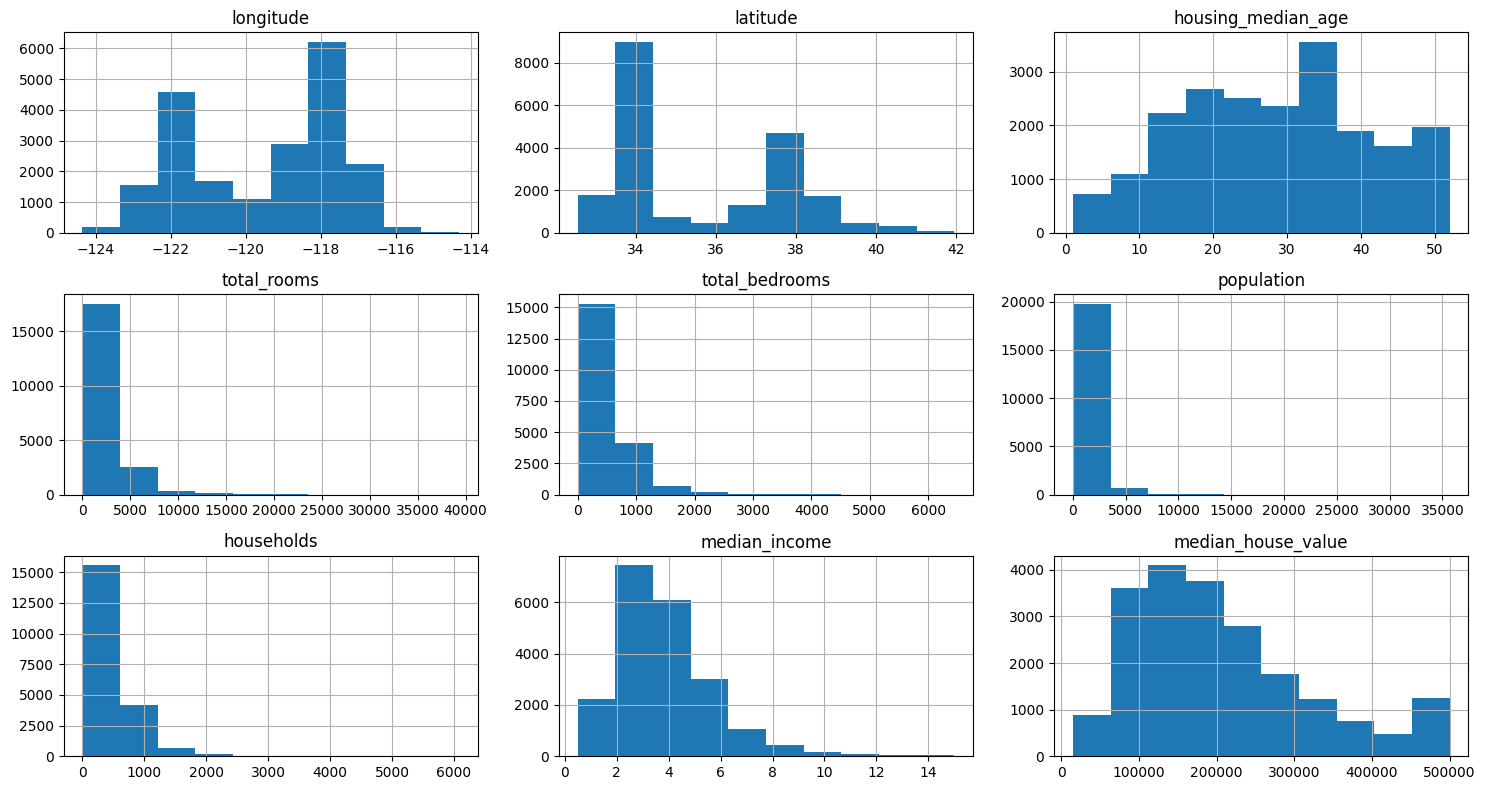

In [42]:
data.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

 Correlation Heatmap

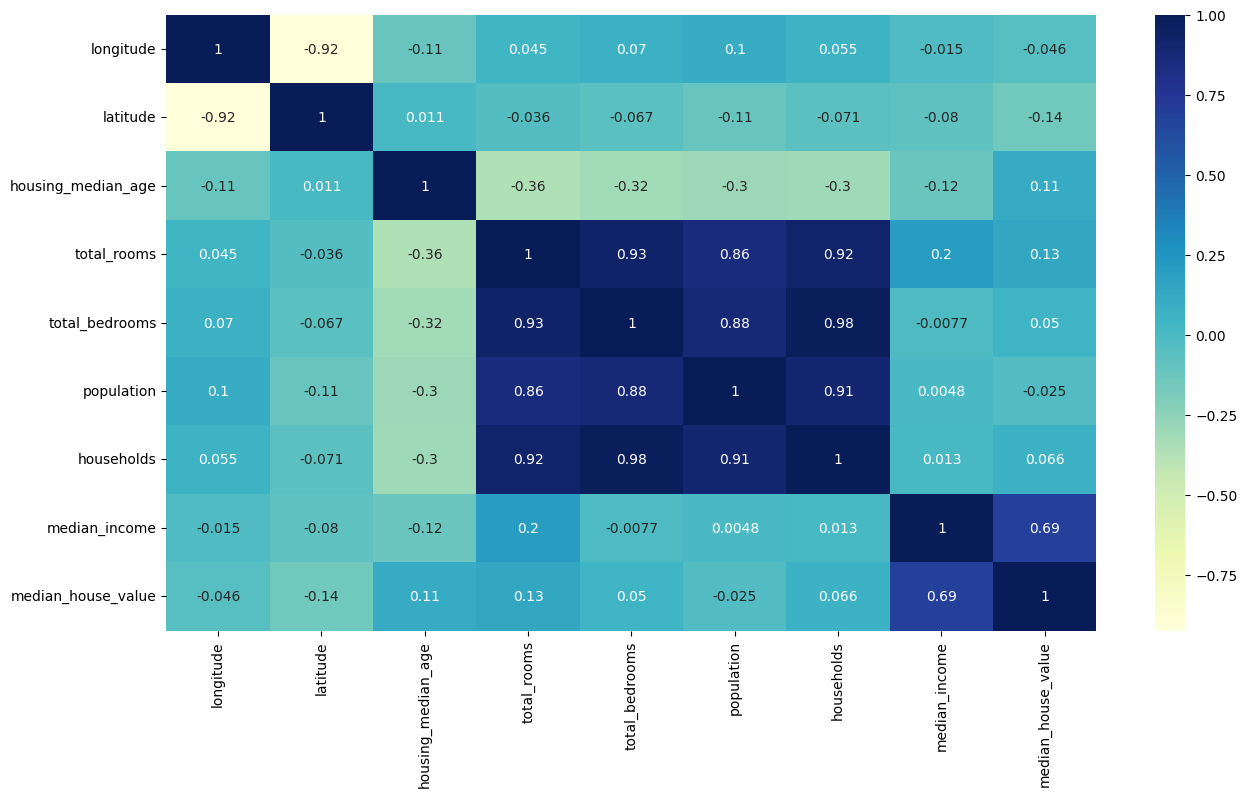

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(['ocean_proximity'],axis=1).corr(),annot = True, cmap = "YlGnBu")
plt.show()

Value counts for ocean_proximity

In [45]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Latitude vs Longitude Scatter Plot colored by House Value

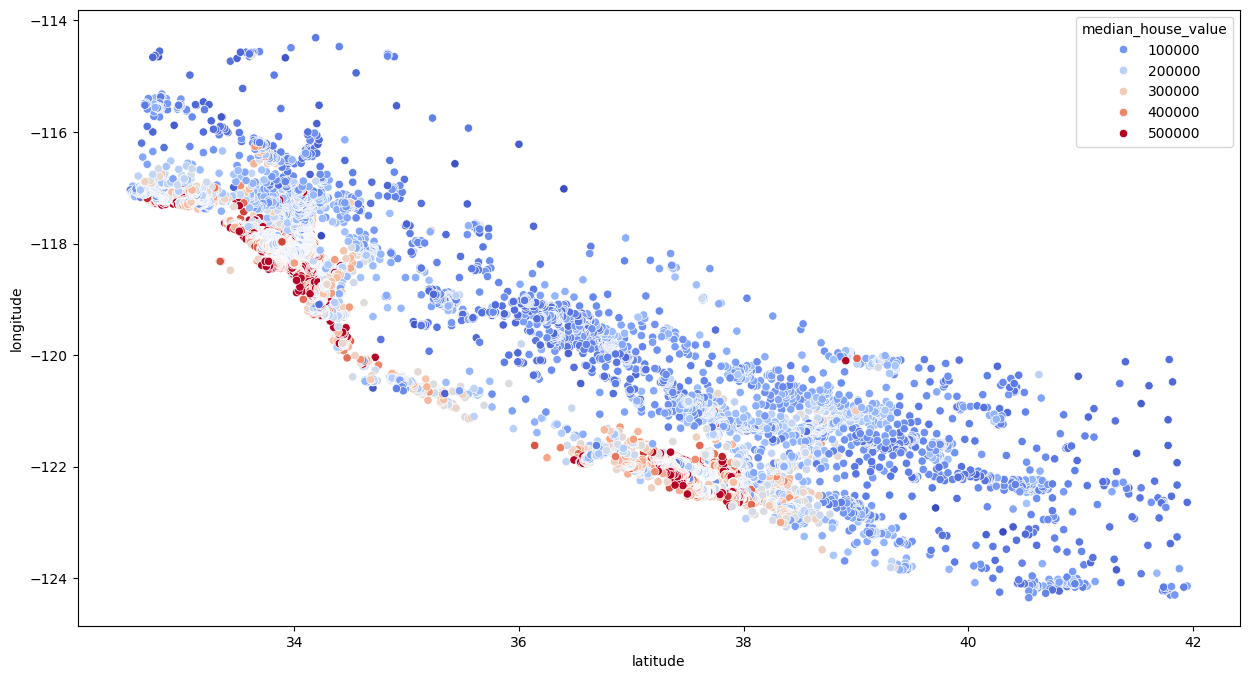

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")
plt.show()

# Data Preprocessing and Feature Engineering

Train-Test Split

In [47]:
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Combine X_train and y_train

In [63]:
train_data = pd.concat([X_train, y_train], axis=1)

Log Transform Skewed Columns

In [64]:
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    train_data[col] = np.log(train_data[col] + 1)

One-Hot Encoding 'ocean_proximity'

In [65]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

Feature Engineering

In [66]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

Final Correlation Heatmap

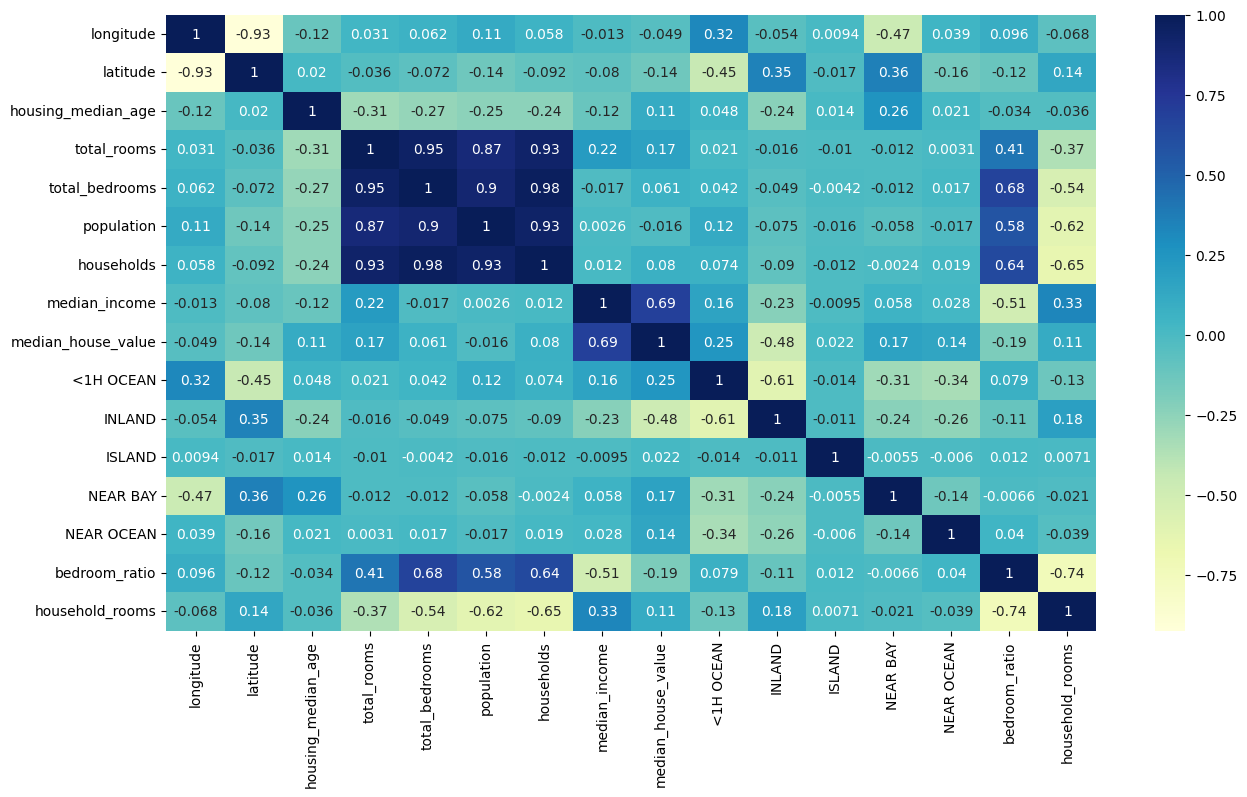

In [67]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

# Linear Regression Model and Evaluation

In [68]:
X_train = train_data.drop(['median_house_value'], axis=1)
y_train = train_data['median_house_value']

In [71]:
X_train.fillna(0, inplace=True)

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [73]:
test_data = pd.concat([X_test, y_test], axis=1)

# Log transforms
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[col] = np.log(test_data[col] + 1)

# One-hot encoding
if 'ocean_proximity' in test_data.columns:
    test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

# Feature engineering
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

# Separate features and target
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value']

# Align test columns with train columns
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

X_test = X_test[X_train.columns]
X_test.fillna(0, inplace=True)


# Model Evaluation

In [78]:
y_pred = reg.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R² Score: {:.2f}".format(r2))


Mean Absolute Error (MAE): 48215.72
Mean Squared Error (MSE): 4393958619.19
R² Score: 0.67


# Plotting Regression Line

Actual Vs Predicted Scatter plot

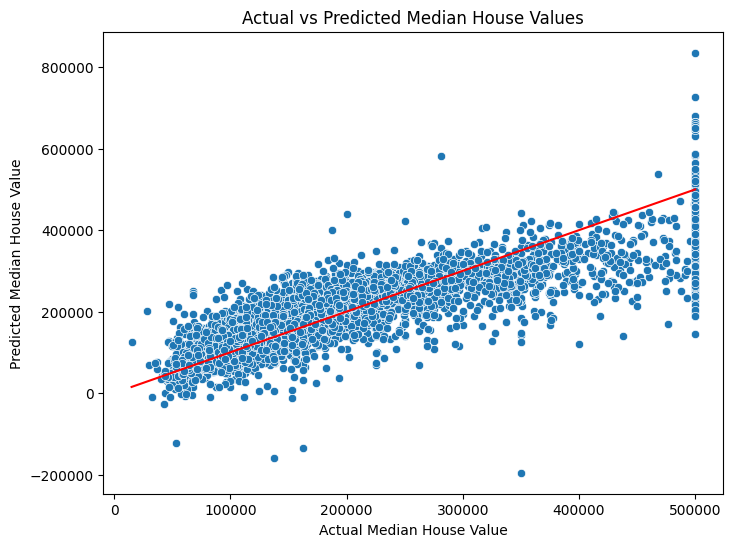

In [82]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  
plt.show()

# Interpreting Coefficients

In [85]:
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': reg.coef_
})


coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])


               Feature    Coefficient
14     household_rooms  191434.504754
6           households  154642.212506
10              ISLAND  121259.399349
13       bedroom_ratio  111460.160873
5           population  -98997.548920
9               INLAND  -56981.310300
7        median_income   38016.590386
3          total_rooms  -30224.541309
0            longitude  -27364.987371
1             latitude  -27183.120670
11            NEAR BAY  -24532.807328
8            <1H OCEAN  -20102.338450
12          NEAR OCEAN  -19642.943270
4       total_bedrooms  -12074.988415
2   housing_median_age     981.864233
